In [ ]:
setwd("~/Documents/Upd-Germline")

source("_targets.R")

In [24]:
tar_load(chic.tile.diameter_500_chr)
tar_load(chromosome_pericetromere_label)

subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[372:767] %>%
  reduce() %>%
  ranges()

analyze_loci <- c(
  seqnames(chic.tile.diameter_500_chr) %in% names(chr.lengths)
) %>%
  replace(
    which(seqnames(chic.tile.diameter_500_chr) == "rDNA")[372:767],
    TRUE
  )
seqnames <- seqnames(chic.tile.diameter_500_chr)[analyze_loci] %>%
  droplevels()
seqnames
gr <- chic.tile.diameter_500_chr[analyze_loci]
gr$region <- seqnames %>%
  as.character() %>%
  paste0(
    rep("", length(.)) %>%
      replace(
        to(findOverlaps(chromosome_pericetromere_label, gr)),
        "C"
      )
  )
table(gr$region)
gr$region <- gr$region %>%
  factor(c("2L", "2LC", "2RC", "2R", "3L", "3LC", "3RC", "3R", "4", "X", "Y", "rDNA"))

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]     36901     76900     40000

factor-Rle of length 1375880 with 8 runs
  Lengths: 235138 252870 281103 320794  13482 235423  36674    396
  Values :   2L     2R     3L     3R     4      X      Y      rDNA
Levels(8): 2L 2R 3L 3R 4 X Y rDNA


    2L    2LC     2R    2RC     3L    3LC     3R    3RC      4      X      Y 
221922  13216 196354  56516 231539  49564 278500  42294  13482 235423  36674 
  rDNA 
   396 

In [27]:

tar_load(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  seqnames

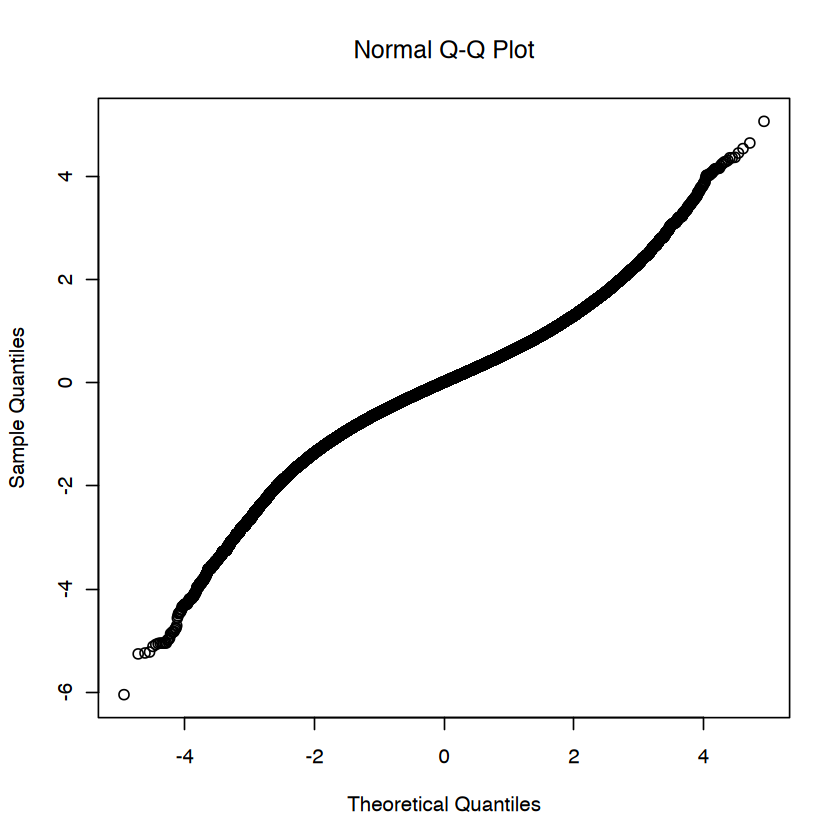

In [34]:
(
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC %>%
    subset(between(abs(.), 1e-6, 9.9))
) %>%
  qqnorm()

In [35]:
tibble(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr$L2FC) %>%
  summarise_all(list(mean, sd))

fn1,fn2
<dbl>,<dbl>
0.01492165,0.9527016


In [38]:
write(deparse(arm.colors), stdout())
arm.colors <- c(
  "2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B",  "3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100",  "4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF",
  rDNA = "#79d2ff"
)
write(deparse(arm.colors), stdout())

c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF")
c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF", rDNA = "#79d2ff"
)


In [69]:
data <- with(
  elementMetadata(gr),
  list(
    H3K4 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K27 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K9 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr$L2FC,
    )
  )
)

In [70]:
library(ggplot2)
gg <- ggplot(data$H3K4, aes(GSC, CySC, color=region)) +
  geom_point(shape = ".", data = \(data) data %>% subset(region %in% levels(region)[1:8]), color = "#cccccc") +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "4"), color = arm.colors["4"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "X"), color = arm.colors["X"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "Y"), color = arm.colors["Y"]) +
  geom_point(shape = ".", data = \(data) data %>% subset(region == "rDNA"), color = arm.colors["rDNA"]) +
  scale_x_continuous(limits = c(-5, 5), expand=c(0, 0)) +
  scale_y_continuous(limits = c(-5, 5), expand=c(0, 0)) +
  theme(
    aspect.ratio = 1,
  )

Warning message:
"Removed 10543 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 103 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 2736 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 3566 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 57 rows containing missing values or values outside the scale range
(`geom_point()`)."


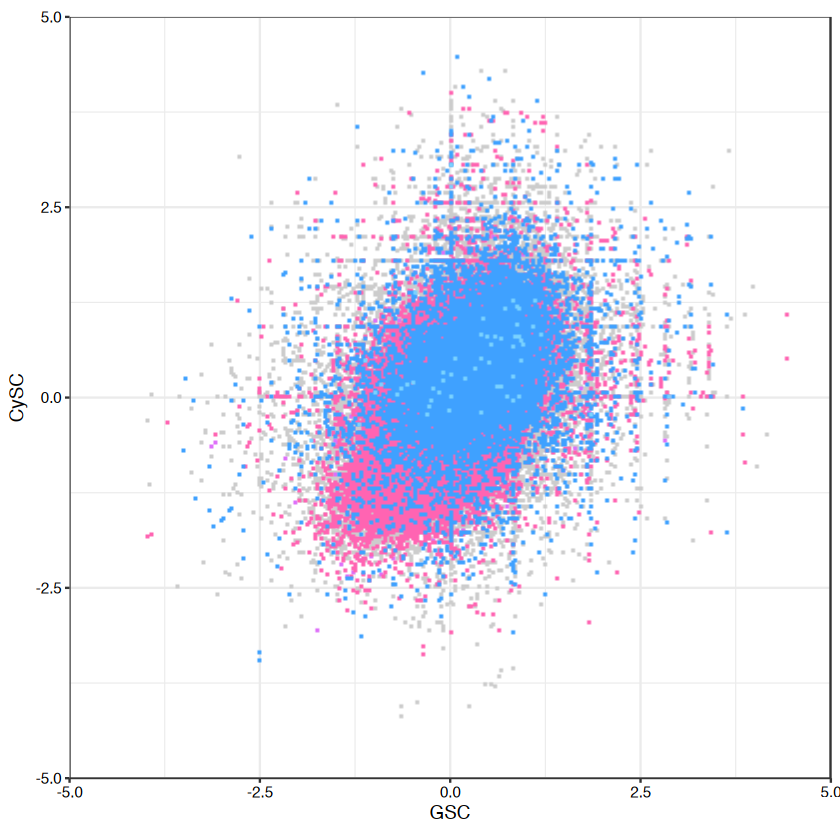

In [65]:
library(ggrastr)
rasterise(gg, dpi=60)

In [71]:
pdf("illustrations/ChromatinCellTypeScatter.pdf", w=6, h=6)
print(rasterise(gg, dpi=120))
dev.off()

Warning message:
"Removed 16086 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 161 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 3892 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 5266 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 46 rows containing missing values or values outside the scale range
(`geom_point()`)."


pdf 
  2

In [72]:
file.size("illustrations/ChromatinCellTypeScatter.pdf")

[1] 107039